In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas_profiling import ProfileReport

C:\Users\ZEPHYRUS\AppData\Local\Temp\ipykernel_11624\1057814030.py:5: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  from pandas_profiling import ProfileReport


In [2]:
df = pd.read_csv('spam.csv', encoding = "ISO-8859-1")
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


## Data cleaning

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [4]:
df = df[['v1', 'v2']]
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [5]:
df.isnull().sum()

v1    0
v2    0
dtype: int64

In [6]:
df.columns = ['target', 'text']

In [7]:
df.sample(2)

,target,text
4286,ham,I wud never mind if u dont miss me or if u don...
1416,ham,No..few hours before.went to hair cut .


In [8]:
df.duplicated().sum()

403

In [9]:
df[df.duplicated()]

,target,text
102,ham,As per your request 'Melle Melle (Oru Minnamin...
153,ham,As per your request 'Melle Melle (Oru Minnamin...
206,ham,"As I entered my cabin my PA said, '' Happy B'd..."
222,ham,"Sorry, I'll call later"
325,ham,No calls..messages..missed calls
...,...,...
5524,spam,You are awarded a SiPix Digital Camera! call 0...
5535,ham,"I know you are thinkin malaria. But relax, chi..."
5539,ham,Just sleeping..and surfing
5553,ham,Hahaha..use your brain dear


In [10]:
df.shape

(5572, 2)

In [11]:
df = df.drop_duplicates()

In [12]:
df.shape

(5169, 2)

In [13]:
from sklearn.preprocessing import LabelEncoder

# 0 : Not spam 
# 1 : spam
le = LabelEncoder()

df['target'] = le.fit_transform(df['target'])

df.sample(2)

,target,text
288,0,"My life Means a lot to me, Not because I love ..."
826,0,Hahaha..use your brain dear


In [14]:
df[df['text'] == "Sorry, I'll call later"]

,target,text
80,0,"Sorry, I'll call later"


## EDA

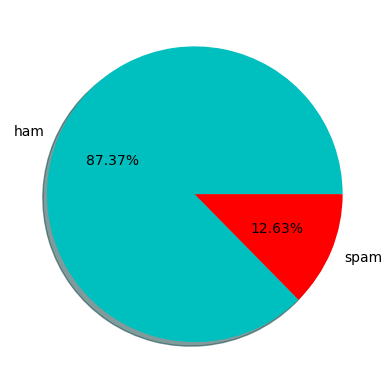

In [15]:
plt.pie(df['target'].value_counts(), labels = ['ham', 'spam'], autopct = '%0.2f%%', shadow = True, colors = ['c', 'r'])
plt.show()
# we can see that our data is highly imbalanced

In [16]:
import nltk

nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ZEPHYRUS\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [17]:
df['num_char'] = df['text'].apply(len)

In [18]:
df['num_word'] = df['text'].apply(lambda x : len(nltk.word_tokenize(x)))
df.head(3) 

,target,text,num_char,num_word
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37


In [19]:
df['text'].apply(lambda x : len(x.split(" ")))

0       20
1        6
2       28
3       11
4       13
        ..
5567    30
5568     8
5569    10
5570    26
5571     6
Name: text, Length: 5169, dtype: int64

In [20]:
df['num_sent'] = df['text'].apply(lambda x : len(nltk.sent_tokenize(x)))

In [21]:
df.sample(3)

,target,text,num_char,num_word,num_sent
1246,0,"I do know what u mean, is the king of not hav...",111,27,4
2397,0,Neshanth..tel me who r u?,25,8,1
1840,0,Yeah. I got a list with only u and Joanna if I...,75,18,2


In [22]:
# for ham
df[df['target'] == 0].iloc[:, 2:].describe()

,num_char,num_word,num_sent
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.120903,1.799601
std,56.358207,13.493725,1.278465
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,28.000000


In [23]:
# for spam 
df[df['target'] == 1].iloc[:, 2:].describe()

,num_char,num_word,num_sent
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.967841
std,30.137753,7.008418,1.483201
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,8.000000


<Axes: xlabel='num_char', ylabel='Count'>

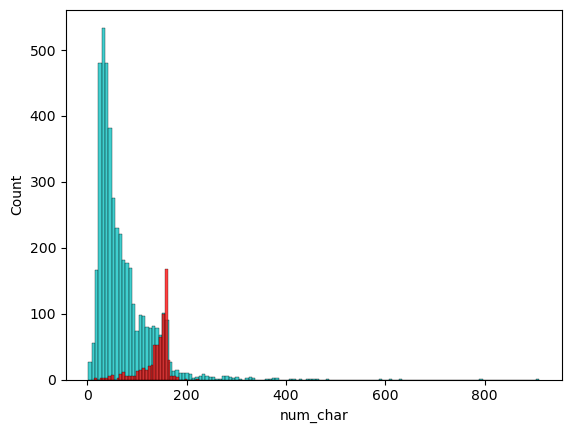

In [24]:
sns.histplot(df[df['target'] == 0]['num_char'], color = 'c')
sns.histplot(df[df['target'] == 1]['num_char'], color = 'r')

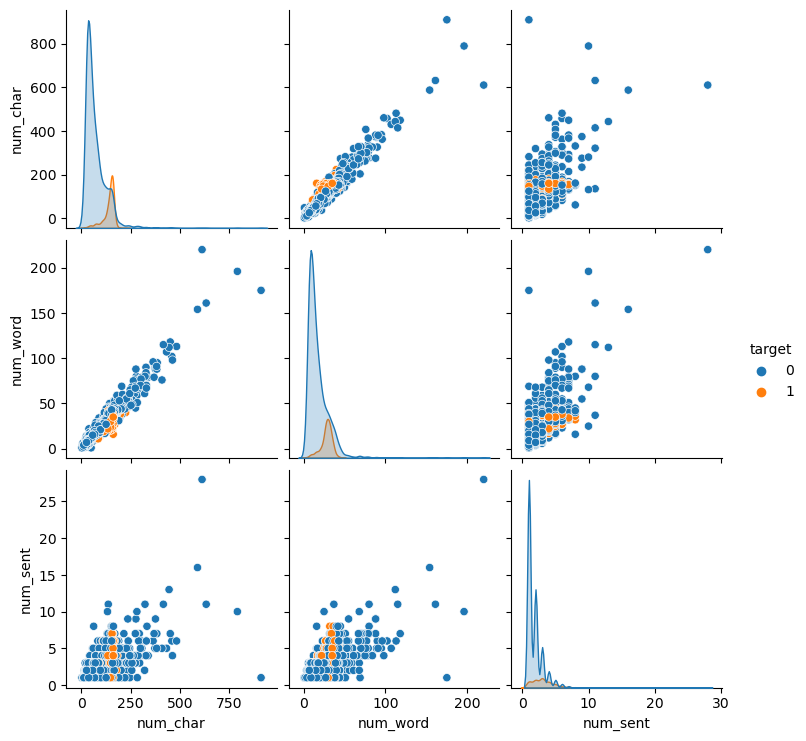

In [25]:
sns.pairplot(df, hue = 'target')

C:\Users\ZEPHYRUS\AppData\Local\Temp\ipykernel_11624\3028576344.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot = True)


<Axes: >

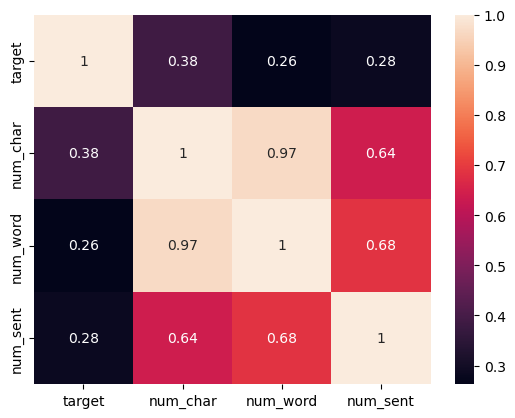

In [26]:
sns.heatmap(df.corr(), annot = True)

## Text Preprocessing 

In [27]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ZEPHYRUS\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [28]:
from nltk.corpus import stopwords

In [29]:
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [30]:
import string 

In [31]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [32]:
from nltk.stem.porter import PorterStemmer

ps = PorterStemmer()

In [33]:
def transform_text(text) :
    text = text.lower()
    text = nltk.word_tokenize(text)
    ans = list()
    for i in text :
        if i.isalnum() :
            ans.append(i)
    
    text = ans[:]
    ans.clear()
    
    for i in text :
        if i not in stopwords.words('english') and i not in string.punctuation :
            ans.append(i)
            
    text = ans[:]
    ans.clear()
    
    for i in text :
        ans.append(ps.stem(i))
    
    return " ".join(ans)

In [34]:
transform_text('are you trying to swam samar%th ?')

'tri swam samar th'

In [35]:
nltk.word_tokenize('are you trying to swam samar%th ?')

['are', 'you', 'trying', 'to', 'swam', 'samar', '%', 'th', '?']

In [36]:
df['transformed_text'] = df['text'].apply(transform_text)

In [37]:
df.head(3)

,target,text,num_char,num_word,num_sent,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...


In [38]:
from wordcloud import WordCloud

wc = WordCloud(width = 1000, height = 1000, min_font_size = 10, background_color = 'white')

In [39]:
spam_corpus = list()

for msg in df[df['target'] == 1]['transformed_text'].tolist() :
    for word in msg.split() :
        spam_corpus.append(word)

In [40]:
len(spam_corpus)

9939

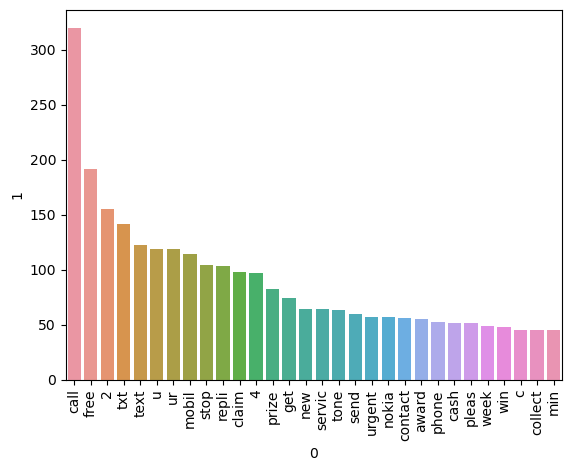

In [41]:
from collections import Counter

most_freq_in_spam = pd.DataFrame(Counter(spam_corpus).most_common(30))

sns.barplot(x = most_freq_in_spam[0],y = most_freq_in_spam[1])
plt.xticks(rotation = 'vertical')
plt.show()

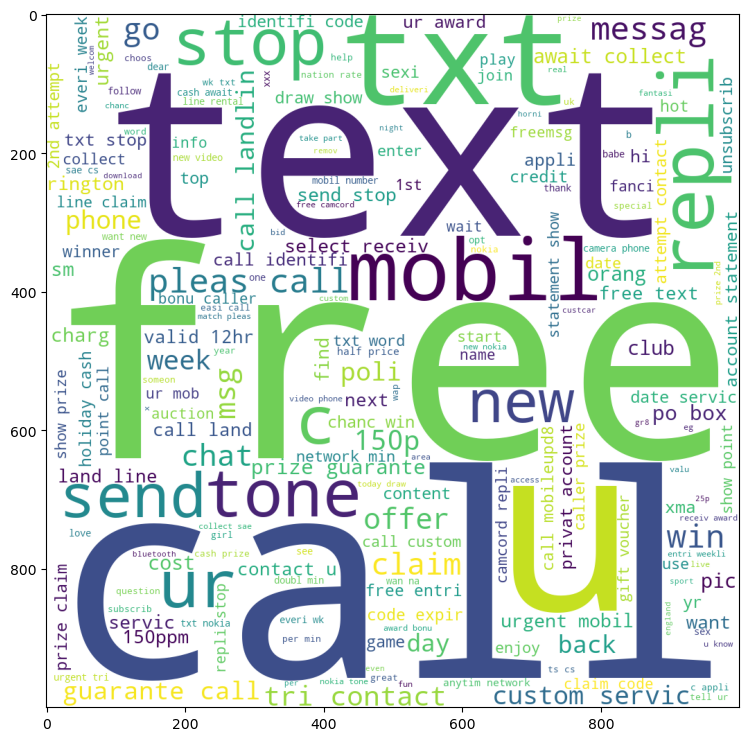

In [42]:
plt.figure(figsize = (9, 9))
spam_wc = wc.generate(df[df['target'] == 1]['transformed_text'].str.cat(sep = " "))

plt.imshow(spam_wc)

In [43]:
ham_corpus = list()

for msg in df[df['target'] == 0]['transformed_text'].tolist() :
    for word in msg.split() :
        ham_corpus.append(word)

In [44]:
len(ham_corpus)

35394

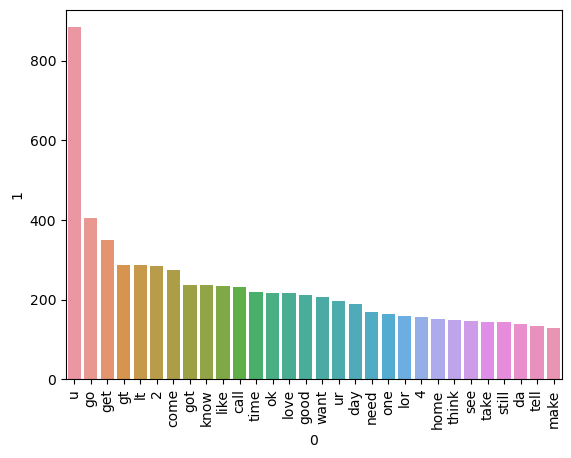

In [45]:
most_freq_in_ham = pd.DataFrame(Counter(ham_corpus).most_common(30))
sns.barplot(x = most_freq_in_ham[0],y = most_freq_in_ham[1])
plt.xticks(rotation = 'vertical')
plt.show()

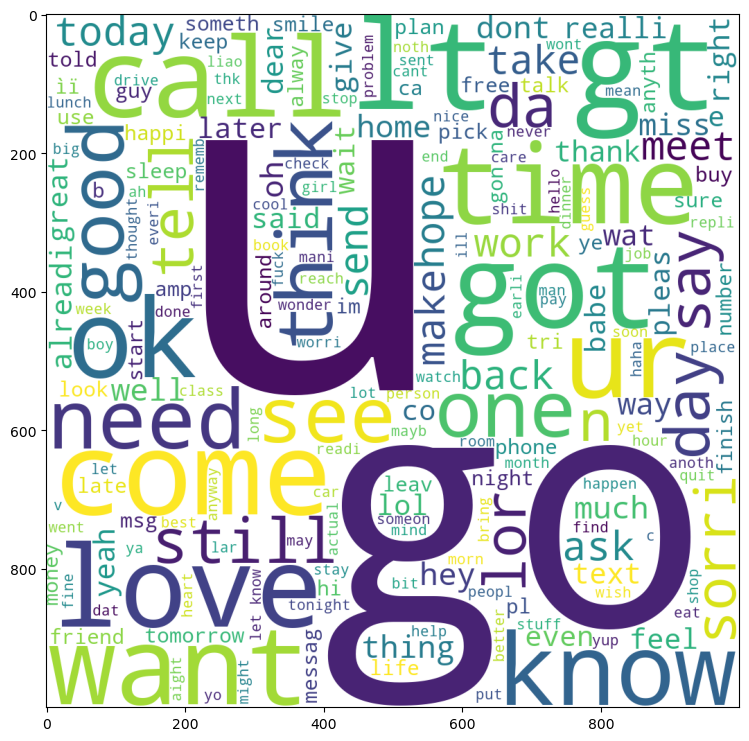

In [46]:
plt.figure(figsize = (9, 9))
ham_wc = wc.generate(df[df['target'] == 0]['transformed_text'].str.cat(sep = " "))

plt.imshow(ham_wc)

## Model Building 

In [47]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(max_features = 4850)

In [48]:
x = cv.fit_transform(df['transformed_text']).toarray()
x

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [49]:
x.shape

(5169, 4850)

In [50]:
y = df['target'].values
y

array([0, 0, 1, ..., 0, 0, 0])

In [51]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 2)

In [52]:
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

In [53]:
gn = GaussianNB()
bn = BernoulliNB()
mn = MultinomialNB()

In [54]:
gn.fit(x_train, y_train)
y_pred1 = gn.predict(x_test)
print(accuracy_score(y_test, y_pred1))
print(confusion_matrix(y_test, y_pred1))
print(precision_score(y_test, y_pred1))

0.8800773694390716
[[792 104]
 [ 20 118]]
0.5315315315315315


In [55]:
# precision_score is Highest So it is more preferable
bn.fit(x_train, y_train)
y_pred2 = bn.predict(x_test)
print(accuracy_score(y_test, y_pred2))
print(confusion_matrix(y_test, y_pred2))
print(precision_score(y_test, y_pred2))

0.9787234042553191
[[896   0]
 [ 22 116]]
1.0


In [56]:
mn.fit(x_train, y_train)
y_pred3 = mn.predict(x_test)
print(accuracy_score(y_test, y_pred3))
print(confusion_matrix(y_test, y_pred3))
print(precision_score(y_test, y_pred3))

0.9738878143133463
[[881  15]
 [ 12 126]]
0.8936170212765957


In [57]:
# let's try Tfidfvectorization
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(max_features = 4950)

In [58]:
xt = tfidf.fit_transform(df['transformed_text']).toarray()
xt.shape

(5169, 4950)

In [59]:
gnt = GaussianNB()
bnt = BernoulliNB()
mnt = MultinomialNB()

In [60]:
x_train2, x_test2, y_train2, y_test2 = train_test_split(xt, y, test_size = 0.2, random_state = 6)

In [61]:
gnt.fit(x_train2, y_train2)
y_pred1t = gnt.predict(x_test2)
print(accuracy_score(y_test2, y_pred1t))
print(confusion_matrix(y_test2, y_pred1t))
print(precision_score(y_test2, y_pred1t))

0.8655705996131529
[[793 117]
 [ 22 102]]
0.4657534246575342


In [62]:
bnt.fit(x_train2, y_train2)
y_pred2t = bnt.predict(x_test2)
print(accuracy_score(y_test2, y_pred2t))
print(confusion_matrix(y_test2, y_pred2t))
print(precision_score(y_test2, y_pred2t))

0.9777562862669246
[[909   1]
 [ 22 102]]
0.9902912621359223


In [63]:
mnt.fit(x_train2, y_train2)
y_pred3t = gnt.predict(x_test2)
print(accuracy_score(y_test2, y_pred3t))
print(confusion_matrix(y_test2, y_pred3t))
print(precision_score(y_test2, y_pred3t))

0.8655705996131529
[[793 117]
 [ 22 102]]
0.4657534246575342


### so best model is countvectorizer with BernoulliNB

In [64]:
# let's try all classification algorithm
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [67]:
svc = SVC(kernel = 'sigmoid', gamma = 1.0)
knc = KNeighborsClassifier()
dtc = DecisionTreeClassifier(max_depth = 5)
lrc = LogisticRegression(solver = 'liblinear', penalty = 'l1')
rfc = RandomForestClassifier(n_estimators = 50, random_state = 3)
abc = AdaBoostClassifier(n_estimators = 50, random_state = 3)
bc = BaggingClassifier(n_estimators = 50, random_state = 3)
etc = ExtraTreesClassifier(n_estimators = 50, random_state = 3)
gbdt = GradientBoostingClassifier(n_estimators = 50, random_state = 3)

In [68]:
clfs = {
    'SVC' : svc,
    'KN' : knc,
    'NB' : bn, 
    'DT' : dtc,
    'LR' : lrc,
    'RF' : rfc,
    'AdaBoost' : abc,
    'Bagging' : bc,
    'ETC' : etc,
    'GBC' : gbdt
}

In [69]:
def test_classifier(clf, x_train, y_train, x_test, y_test) :
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    
    return accuracy, precision

In [70]:
all_accuracy = list()
all_precision = list()

for name, clf in clfs.items() :
    current_accuracy, current_precision = test_classifier(clf, x_train, y_train, x_test, y_test)
    
    print(name, " : ", "Accuracy -> ", current_accuracy, "  Precision -> ", current_precision)
    
    all_accuracy.append(current_accuracy)
    all_precision.append(current_precision)

SVC  :  Accuracy ->  0.9284332688588007   Precision ->  0.7580645161290323
KN  :  Accuracy ->  0.90715667311412   Precision ->  1.0
NB  :  Accuracy ->  0.9787234042553191   Precision ->  1.0
DT  :  Accuracy ->  0.9245647969052224   Precision ->  0.9166666666666666
LR  :  Accuracy ->  0.9709864603481625   Precision ->  0.9736842105263158
RF  :  Accuracy ->  0.9661508704061895   Precision ->  0.9813084112149533
AdaBoost  :  Accuracy ->  0.9632495164410058   Precision ->  0.9464285714285714
Bagging  :  Accuracy ->  0.9632495164410058   Precision ->  0.923728813559322
ETC  :  Accuracy ->  0.9758220502901354   Precision ->  0.9829059829059829
GBC  :  Accuracy ->  0.9439071566731141   Precision ->  0.9444444444444444


In [71]:
import pickle 

pickle.dump(cv, open('CountVetorizer.pkl', 'wb'))
pickle.dump(bn, open('model.pkl', 'wb'))